# BITS - NLP - Assignment2 – PS1
*Natural Language Processing (S1-23_AIMLCZG530)*

**Assignment dataset:**  Amazon Fine food review

**Assignment dataset link :** https://drive.google.com/file/d/1x0oiWyLUns9002jTDj2CzIE6yqbglN__/view?usp=sharing

**Assignment Group:** 91

**Group Members :**
1. Sacheen M V   - BITS ID: 2022ac05305
2. Kashif Saiyed - BITS ID: 2022ac05668
3. Kulkarni Mangesh Madhukar - BITS ID: 2022ac05705
4. Vibhav Kumar Gautam       - BITS ID: 2022ac05413

**Submission Date:** 26-Mar-2024

# Description of Data: 

This is the Amazon Fine food review dataset.
Each record consists of the following attributes: 
The column or features in the dataset: 

 Id  ProductId — unique identifier for the product  UserId — unqiue identifier for the user  ProfileName  HelpfulnessNumerator — number of users who found the review helpful  HelpfulnessDenominator — number of users who indicated whether they found the review helpful or not  Score — rating between 1 and 5  Time — timestamp for the review  Summary — brief summary of the review  Text — text of the review

## Import required Libraries

In [12]:
# pip install spacy

In [13]:
# pip install gensim

In [14]:
# pip install matplotlib

In [15]:
# pip install spacy

In [16]:
import pandas as pd  
import gensim  
from gensim import corpora  
from gensim.models import CoherenceModel  
from gensim.models import LdaModel  
import matplotlib.pyplot as plt  
import spacy  
from spacy import displacy  
# import pyLDAvis

## Load given Dataset - Reviews.csv

In [17]:
#place the given input file into local drive, and provide the path here
Dataurl = "D:/NLP_Reviews_Assignment2_Dataset.csv"

# Read csv file
df = pd.read_csv(Dataurl)

# To take the given input file from the google colab
# drive.mount('/content/drive')
# Dataurl= os.path.join('/content/drive/My Drive/Reviews/Reviews_F1.csv')

In [18]:
#retrieves the first 9 rows of a DataFrame
df.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


## Task 1. Perform EDA and necessary pre-processing steps in dataset. (2 Mark)

In [19]:
# Checking for null values  
print(df.isnull().sum())  
  
# Dropping null values  
df = df.dropna()  

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [20]:
#number of rows in the dataset
len(df)

#limit the dataset to 1000 rows for faster processing
df = df.head(1000)

In [21]:
# Converting reviews to list  
data = df.Text.values.tolist()

In [22]:
# Tokenizing words and cleaning-up text  
def tokenization(texts):  
    for sentence in texts:  
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations  
  
data_words = list(tokenization(data))  

## Task 2. Using the LDA algorithm create the Topics (Min 10) for the Corpus. (2 Mark)
#### NOTE: Use Text Column

In [23]:
# Creating Dictionary  
id2word = corpora.Dictionary(data_words)

In [24]:
# Creating Corpus  
texts = data_words

In [25]:
# Term Document Frequency  
corpus = [id2word.doc2bow(text) for text in texts]  

In [26]:
# Building LDA model  
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,  
                                           id2word=id2word,  
                                           num_topics=10,   
                                           random_state=100,  
                                           update_every=1,  
                                           chunksize=100,  
                                           passes=10,  
                                           alpha='auto',  
                                           per_word_topics=True)  

## Task 3. Compute the coherence score and print Topics Extracted. (2 Mark)

In [27]:
# Compute Coherence Score  
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')  
coherence_lda = coherence_model_lda.get_coherence()

print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4865286117917914


In [28]:
# Print the Topics  
print(lda_model.print_topics())  
doc_lda = lda_model[corpus]  

[(0, '0.201*"tea" + 0.019*"teas" + 0.017*"flower" + 0.013*"grey" + 0.012*"loose" + 0.011*"numi" + 0.011*"yunnan" + 0.009*"nearly" + 0.009*"plan" + 0.007*"pot"'), (1, '0.035*"bars" + 0.028*"salty" + 0.027*"crunchy" + 0.019*"shipped" + 0.016*"packaging" + 0.014*"wonderful" + 0.014*"crispy" + 0.014*"carry" + 0.013*"greasy" + 0.011*"style"'), (2, '0.058*"food" + 0.039*"he" + 0.026*"she" + 0.024*"her" + 0.022*"we" + 0.020*"loves" + 0.019*"rice" + 0.019*"old" + 0.016*"his" + 0.014*"our"'), (3, '0.035*"chips" + 0.026*"com" + 0.025*"received" + 0.025*"kettle" + 0.018*"gp" + 0.016*"http" + 0.016*"www" + 0.016*"href" + 0.015*"such" + 0.014*"msg"'), (4, '0.045*"son" + 0.024*"pieces" + 0.022*"things" + 0.022*"item" + 0.022*"red" + 0.015*"delivery" + 0.013*"cups" + 0.013*"ounce" + 0.012*"weeks" + 0.012*"husband"'), (5, '0.043*"potato" + 0.019*"daughter" + 0.017*"grocery" + 0.017*"being" + 0.015*"month" + 0.015*"amount" + 0.014*"price" + 0.011*"money" + 0.011*"big" + 0.011*"look"'), (6, '0.047*"enjo

## Task 4. Visualize the topics. (1 Mark)

In [29]:
# pip install pyLDAvis

In [30]:
# pip install --upgrade pyLDAvis

In [31]:
# pip install gensim

In [32]:
#command to visualize the topics using pyLDAvis, a popular visualization library for LDA
# pyLDAvis.enable_notebook()  
# vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)  
# vis

In [35]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 300.0/300.0 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


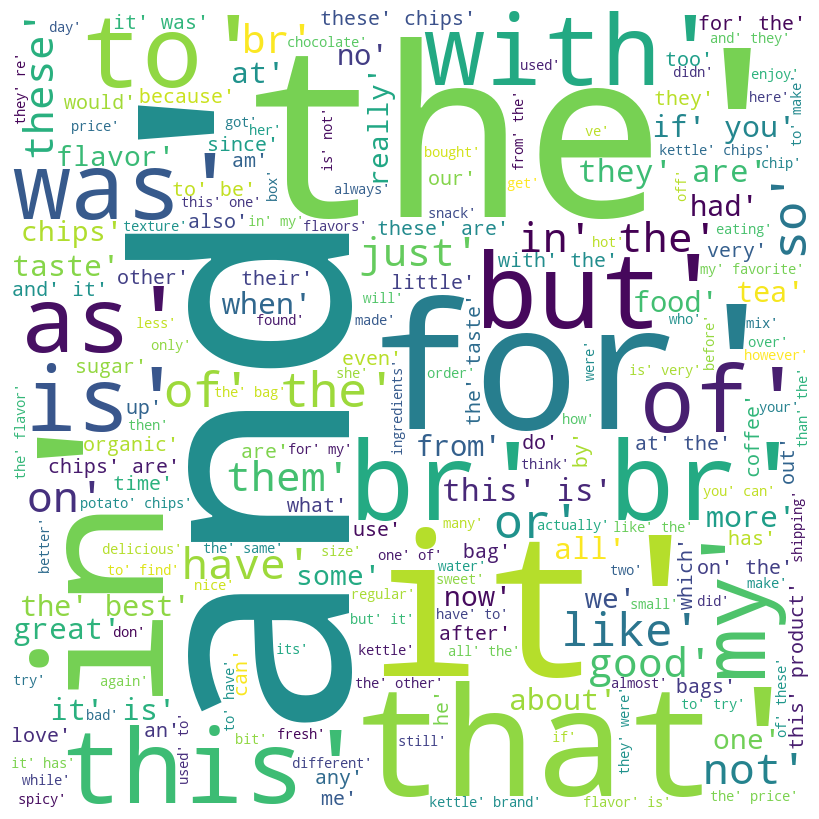

In [36]:
#using matplotlib to display the lda_model, corpus, id2word

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate word cloud image
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(str(data_words))

# Plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# Display the generated image:
wordcloud.to_file("wordcloud.png")

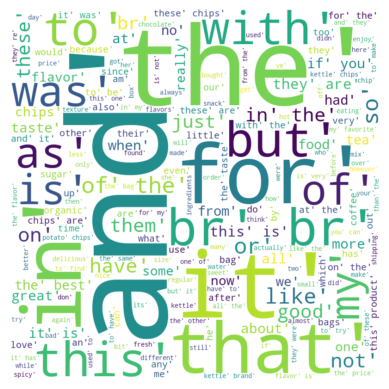

In [37]:
# Display the word cloud image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Task 5. Plot the dependency parser for any two random sentences from the entire corpus/dataset that has at least 10 words in the sentence. (3 Mark)

In [ ]:
# run the below command to download the model in terminal
# python -m spacy download en_core_web_sm

In [39]:
# Load the spacy model: 'en_core_web_sm'
# what is en_core_web_sm?
# en_core_web_sm is a small English model that supports all core capabilities and is trained on web text.
nlp = spacy.load("en_core_web_sm")

In [40]:
# Selecting two random sentences with at least 10 words  
sentence1 = df['Text'].sample(n=1).values[0]
sentence2 = df['Text'].sample(n=1).values[0]
  
doc1 = nlp(sentence1)
doc2 = nlp(sentence2)

In [41]:
# Displaying the sentences with their syntactic dependency parse  
displacy.serve(doc1, style="dep")

C:\Users\sache\AppData\Roaming\Python\Python310\site-packages\spacy\displacy\__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [42]:
displacy.serve(doc2, style="dep")


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.
